# Rhys Elliott

## Research question/interests

One of the most important aspects obeing a NHL goalies is being able to perform under pressure.  I will analyze which NHL goalies have the highest save rate while shorthanded and comparing it to their even strength save percentage.  Their "clutch factor"  will also be compared to their win rate to give an idea of how key of a role they played in their victories.s.

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

APINHLStatistics = pd.read_csv("https://raw.githubusercontent.com/data301-2021-winter1/project-group56-project/main/data/raw/APINHLStatistics.csv?token=AVRK7B23RG6RJKXAKVX6R43BQ4742", low_memory=False)
APINHLStatistics = APINHLStatistics.dropna()
APINHLStatistics


,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,...,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage,play_id,strength,gameWinningGoal,emptyNet
1,2.016020e+09,8473461.0,4.0,2011.0,0.0,0.0,0.0,11.0,9.0,1.0,...,10.0,1.0,L,81.818182,100.0,80.000000,2016020045_97,Even,False,False
2,2.016020e+09,8470645.0,16.0,3598.0,0.0,0.0,0.0,27.0,23.0,2.0,...,23.0,4.0,W,85.185185,50.0,91.304348,2016020045_103,Power Play,False,False
3,2.017021e+09,8468011.0,24.0,3696.0,0.0,0.0,0.0,33.0,30.0,1.0,...,28.0,2.0,W,90.909091,50.0,96.428571,2016020045_140,Power Play,False,False
4,2.017021e+09,8475215.0,7.0,3539.0,0.0,0.0,0.0,33.0,29.0,4.0,...,27.0,5.0,L,87.878788,80.0,88.888889,2016020045_197,Power Play,False,False
5,2.015020e+09,8473575.0,21.0,3600.0,0.0,0.0,0.0,21.0,20.0,3.0,...,17.0,3.0,W,95.238095,100.0,94.117647,2016020045_214,Even,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56649,2.018030e+09,8476412.0,19.0,3487.0,0.0,0.0,0.0,31.0,27.0,3.0,...,26.0,4.0,L,87.096774,75.0,88.461538,2009020965_5,Power Play,False,False
56650,2.018030e+09,8471695.0,6.0,3600.0,0.0,0.0,0.0,29.0,28.0,12.0,...,16.0,12.0,W,96.551724,100.0,93.750000,2009020965_7,Even,False,False
56651,2.018030e+09,8476412.0,19.0,3487.0,0.0,0.0,0.0,31.0,27.0,3.0,...,26.0,4.0,L,87.096774,75.0,88.461538,2009020965_10,Even,True,False
56652,2.018030e+09,8476412.0,19.0,3600.0,0.0,0.0,0.0,33.0,32.0,3.0,...,30.0,3.0,W,96.969697,100.0,96.666667,2009020751_2,Even,False,False


# Milestone 3

Task 1

In [127]:
APINHLStatistics.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'pim', 'shots', 'saves', 'powerPlaySaves', 'shortHandedSaves',
       'evenSaves', 'shortHandedShotsAgainst', 'evenShotsAgainst',
       'powerPlayShotsAgainst', 'decision', 'savePercentage',
       'powerPlaySavePercentage', 'evenStrengthSavePercentage', 'play_id',
       'strength', 'gameWinningGoal', 'emptyNet'],
      dtype='object')

In [128]:
APINHLStatistics.shape

(46935, 23)

In [129]:
APINHLStatistics.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,...,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage,play_id,strength,gameWinningGoal,emptyNet
1,2.016020e+09,8473461.0,4.0,2011.0,0.0,0.0,0.0,11.0,9.0,1.0,...,10.0,1.0,L,81.818182,100.0,80.000000,2016020045_97,Even,False,False
2,2.016020e+09,8470645.0,16.0,3598.0,0.0,0.0,0.0,27.0,23.0,2.0,...,23.0,4.0,W,85.185185,50.0,91.304348,2016020045_103,Power Play,False,False
3,2.017021e+09,8468011.0,24.0,3696.0,0.0,0.0,0.0,33.0,30.0,1.0,...,28.0,2.0,W,90.909091,50.0,96.428571,2016020045_140,Power Play,False,False
4,2.017021e+09,8475215.0,7.0,3539.0,0.0,0.0,0.0,33.0,29.0,4.0,...,27.0,5.0,L,87.878788,80.0,88.888889,2016020045_197,Power Play,False,False
5,2.015020e+09,8473575.0,21.0,3600.0,0.0,0.0,0.0,21.0,20.0,3.0,...,17.0,3.0,W,95.238095,100.0,94.117647,2016020045_214,Even,False,False


In [130]:
APINHLStatistics.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            56644, 56645, 56646, 56647, 56648, 56649, 56650, 56651, 56652,
            56654],
           dtype='int64', length=46935)

In [131]:
type(APINHLStatistics)

pandas.core.frame.DataFrame

In [132]:
APINHLStatistics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46935 entries, 1 to 56654
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   game_id                     46935 non-null  float64
 1   player_id                   46935 non-null  float64
 2   team_id                     46935 non-null  float64
 3   timeOnIce                   46935 non-null  float64
 4   assists                     46935 non-null  float64
 5   goals                       46935 non-null  float64
 6   pim                         46935 non-null  float64
 7   shots                       46935 non-null  float64
 8   saves                       46935 non-null  float64
 9   powerPlaySaves              46935 non-null  float64
 10  shortHandedSaves            46935 non-null  float64
 11  evenSaves                   46935 non-null  float64
 12  shortHandedShotsAgainst     46935 non-null  float64
 13  evenShotsAgainst            469

In [133]:
APINHLStatistics['decision']

1        L
2        W
3        W
4        L
5        W
        ..
56649    L
56650    W
56651    L
56652    W
56654    W
Name: decision, Length: 46935, dtype: object

In [134]:
subset = APINHLStatistics[['game_id', 'shots', 'saves']]
subset

,game_id,shots,saves
1,2.016020e+09,11.0,9.0
2,2.016020e+09,27.0,23.0
3,2.017021e+09,33.0,30.0
4,2.017021e+09,33.0,29.0
5,2.015020e+09,21.0,20.0
...,...,...,...
56649,2.018030e+09,31.0,27.0
56650,2.018030e+09,29.0,28.0
56651,2.018030e+09,31.0,27.0
56652,2.018030e+09,33.0,32.0


In [135]:
APINHLStatistics.loc[APINHLStatistics['decision'] == 'W', ['shots', 'saves']]

,shots,saves
2,27.0,23.0
3,33.0,30.0
5,21.0,20.0
8,21.0,20.0
10,23.0,22.0
...,...,...
56646,39.0,38.0
56648,29.0,28.0
56650,29.0,28.0
56652,33.0,32.0


In [136]:
APINHLStatistics.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
count,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000,46935.000000
mean,2010693177.759412,8468058.344817,16.860083,3539.906594,0.022094,0.000192,0.090785,29.346096,26.775498,4.549142,0.825972,21.399787,0.902141,23.219708,5.223479,90.666790,84.663853,91.621785
std,6061441.176228,7451.058408,11.083641,431.962762,0.148578,0.013846,0.593859,7.378900,7.378235,3.096832,1.069898,6.684599,1.128939,6.776589,3.277791,6.269778,22.013991,6.742545
min,2000020001.000000,8445275.000000,1.000000,196.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,20.000000,0.000000,0.000000
25%,2006020350.000000,8462052.000000,8.000000,3550.000000,0.000000,0.000000,0.000000,25.000000,22.000000,2.000000,0.000000,17.000000,0.000000,19.000000,3.000000,87.500000,75.000000,88.235294
50%,2011020585.000000,8470216.000000,16.000000,3600.000000,0.000000,0.000000,0.000000,29.000000,27.000000,4.000000,1.000000,21.000000,1.000000,23.000000,5.000000,91.666667,92.857143,92.592593
75%,2016021095.000000,8473575.000000,24.000000,3600.000000,0.000000,0.000000,0.000000,34.000000,31.000000,6.000000,1.000000,26.000000,1.000000,28.000000,7.000000,95.000000,100.000000,96.000000
max,2019030416.000000,8480925.000000,54.000000,9027.000000,2.000000,1.000000,27.000000,88.000000,85.000000,25.000000,15.000000,76.000000,15.000000,79.000000,28.000000,100.000000,100.000000,100.000000


Task 2

In [24]:
APINHLStatistics = pd.read_csv("https://raw.githubusercontent.com/data301-2021-winter1/project-group56-project/main/data/raw/APINHLStatistics.csv?token=AVRK7B23RG6RJKXAKVX6R43BQ4742", low_memory=False)
APINHLStatistics = APINHLStatistics.dropna()

APINHLStatistics["PKSave%"] = (
    APINHLStatistics["shortHandedSaves"] / APINHLStatistics["shortHandedShotsAgainst"]
                              )*100


In [138]:
APINHLStatistics = APINHLStatistics.rename(columns = {'powerPlaySavePercentage': 'PPSave%',
                                                      'evenStrengthSavePercentage': 'evenSave%',
                                                      'player_id': 'playerID',
                                                      'game_id': 'gameID'
                                                     }
                                          )

In [139]:
APINHLStatistics = APINHLStatistics[['playerID', 'PPSave%', 'PKSave%', 'evenSave%']]
APINHLStatistics.sort_values(by=["PKSave%"], ascending = False)
APINHLStatistics.groupby('playerID').mean()

,PPSave%,PKSave%,evenSave%
playerID,,,
8445275.0,84.128633,90.000000,92.267430
8445386.0,84.501001,92.459893,91.060718
8445470.0,84.226765,81.250000,88.837731
8445769.0,85.204191,95.128205,92.035062
8446719.0,81.432922,88.260870,90.133686
...,...,...,...
8480162.0,83.333333,100.000000,87.171053
8480213.0,100.000000,NaN,90.322581
8480382.0,86.383760,93.478261,90.889765


Task 3

In [2]:
def load_and_process(url):
    """
    first line: loading my dataset to the dataframe
    second line: dropping any lines that contain NaN values. Can't use these to rank goalies.
    """
    df1 = (
            pd.read_csv(url, low_memory = False)
            .dropna()
            )
    
    """
    first line: rename some columns so they are more readable
    second line: combining the goalies by their numbers.  then averages out all of their stats across games.
    third line: creates a new columns "PKSavePercentage". combines shortHandedShotsAgainst and
    shortHandedSaves to get their save percentage on the penalty kill.
    fourth line: drops columns that won't be useful for the final analysis.
    fifth line: sorts from highest penalty kill save percentage to lowest.
    """
    df2 = (
           df1
            .rename(columns = {'powerPlaySavePercentage': 'PPSave%',
                              'evenStrengthSavePercentage': 'evenSave%',
                              'player_id': 'playerID',
                              'game_id': 'gameID'})
            .groupby('playerID').mean()
            .assign(PKSavePercentage=lambda x:(x.shortHandedSaves/x.shortHandedShotsAgainst)*100) 
            .drop(['team_id', 'timeOnIce', 'assists', 'goals',
                   'pim', 'shots', 'saves', 'powerPlaySaves', 'shortHandedSaves',
                   'evenSaves', 'shortHandedShotsAgainst', 'evenShotsAgainst',
                   'powerPlayShotsAgainst'], axis=1)
            .sort_values(by=["PKSavePercentage"], ascending = False)
           
        )
   
    """
    first line: drop any PKSavePercentages (our new column) that has NaN values
    second line: goalies with 100% PKSavePercentages is impossible if they've played enough games
    in order to get rid of these, for example, backup goalies who have played few games and whose 
    data is skewed, we will filter out anybody with a 100% save rate on the penalty kill
    """
    df3 = (
        df2
        .dropna()
        .query('PKSavePercentage != 100')
        )
    
    return df3
          

In [3]:
df1 = load_and_process("https://raw.githubusercontent.com/data301-2021-winter1/project-group56-project/main/data/raw/APINHLStatistics.csv?token=AVRK7B23RG6RJKXAKVX6R43BQ4742")
df1=df1.iloc[:-3, :]
df1_mask = df1.query('PKSavePercentage > 50')

df = load_and_process("https://raw.githubusercontent.com/data301-2021-winter1/project-group56-project/main/data/raw/APINHLStatistics.csv?token=AVRK7B23RG6RJKXAKVX6R43BQ4742")
df

,gameID,savePercentage,PPSave%,evenSave%,PKSavePercentage
playerID,,,,,
8452217.0,2.000271e+09,86.830312,80.666590,88.768579,97.916667
8467430.0,2.006850e+09,89.579614,87.449407,90.291678,97.619048
8476876.0,2.018234e+09,89.017586,79.511462,89.990470,97.101449
8475717.0,2.016128e+09,89.439297,80.190195,90.468710,97.058824
8477967.0,2.018755e+09,91.404799,88.218254,91.723718,96.875000
...,...,...,...,...,...
8475097.0,2.011021e+09,85.357143,81.666667,87.026515,50.000000
8469569.0,2.010021e+09,90.049140,100.000000,95.454545,33.333333
8465091.0,2.000021e+09,84.230769,100.000000,86.147186,33.333333


In [30]:
def barGraph(url):
    """
    first line: loading my dataset to the dataframe
    second line: dropping any lines that contain NaN values. Can't use these to rank goalies.
    """
    df1 = (
            pd.read_csv(url, low_memory = False)
            .dropna()
            )
    
    """
    first line: rename some columns so they are more readable
    second line: combining the goalies by their numbers.  then averages out all of their stats across games.
    third line: creates a new columns "PKSavePercentage". combines shortHandedShotsAgainst and
    shortHandedSaves to get their save percentage on the penalty kill.
    fourth line: drops columns that won't be useful for the final analysis.
    fifth line: sorts from highest penalty kill save percentage to lowest.
    """
    df2 = (
           df1
            .rename(columns = {'powerPlaySavePercentage': 'PPSave%',
                              'evenStrengthSavePercentage': 'evenSave%',
                              'player_id': 'playerID',
                              'game_id': 'gameID'})

            .assign(PKSavePercentage=lambda x:(x.shortHandedSaves/x.shortHandedShotsAgainst)*100) 
            .drop(['team_id', 'timeOnIce', 'assists', 'goals',
                   'pim', 'shots', 'saves', 'powerPlaySaves', 'shortHandedSaves',
                   'evenSaves', 'shortHandedShotsAgainst', 'evenShotsAgainst',
                   'powerPlayShotsAgainst'], axis=1)
            .sort_values(by=["PKSavePercentage"], ascending = False)
            .dropna()
           
    )
    
    return df2
          

Task 4

 #### Analysis
 
 - Over two NHL seasons, there were a total of 322 goalies who played
 - Of those, only 243 had to kill a penalty (short handed)
 -  Many of the best goalies had a penalty kill save percentage that was higher than their even strength save percentage.
 - Many of the goalies with a high PKSavePercentage have a lower PPSavePercentage.  This means they let in more goals per shots faced when they are on the powerplay than when they are killing a penalty.
 

#### Pandas Profiling Analysis

- From the profiling report, aside from saves, goalies don't offer any more statistics.  Their goals, assists and PIM are averaged at less than 1.
- The most goals a goalies scored in a game is 1 which is quite impressive! The most assists in a game is 2.
- One goalie managed to rack up 27 penalty minutes in a single game! That's 300 times the mean.
- The min for short handed saves was -1.  This mean the opponent must've scored without shooting.  This is a result of an own-goal.

In [ ]:
import RhysNotebook_function

RhysNotebook_function.load_and_process("https://raw.githubusercontent.com/data301-2021-winter1/project-group56-project/main/data/raw/APINHLStatistics.csv?token=AVRK7B23RG6RJKXAKVX6R43BQ4742")

In [33]:
df3 = barGraph("https://raw.githubusercontent.com/data301-2021-winter1/project-group56-project/main/data/raw/APINHLStatistics.csv?token=AVRK7B3G6ORNQP6Q6GDQ53LBRD6FW")
df3 = df3.iloc[:-3, :]
df3

,gameID,playerID,decision,savePercentage,PPSave%,evenSave%,play_id,strength,gameWinningGoal,emptyNet,PKSavePercentage
30273,2.006021e+09,8469514.0,W,100.000000,100.000000,100.000000,2012020105_161,Even,False,False,100.0
37429,2.005020e+09,8464999.0,W,91.891892,92.307692,91.304348,2012020686_124,Power Play,True,False,100.0
37475,2.005020e+09,8460712.0,W,97.368421,90.000000,100.000000,2012020406_215,Even,False,False,100.0
37474,2.005020e+09,8462117.0,L,93.333333,88.888889,94.444444,2012020406_213,Power Play,False,False,100.0
37468,2.005020e+09,8445386.0,L,80.000000,33.333333,85.000000,2012020493_291,Even,False,False,100.0
...,...,...,...,...,...,...,...,...,...,...,...
12692,2.012020e+09,8471469.0,W,86.363636,50.000000,100.000000,2016020497_208,Even,False,False,0.0
36445,2.005020e+09,8462117.0,W,88.000000,100.000000,89.473684,2013020484_76,Even,True,False,0.0
51598,2.018020e+09,8476899.0,L,92.307692,100.000000,95.833333,2010021222_105,Even,True,False,0.0
12694,2.013021e+09,8473972.0,L,72.727273,100.000000,77.777778,2016020497_213,Even,False,False,0.0


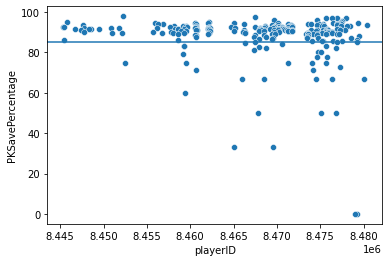

In [42]:
plot1 = sns.scatterplot(data=df,x="playerID", y="PKSavePercentage")
plot1.axhline(85)
plt.show()

<AxesSubplot:xlabel='PKSavePercentage'>

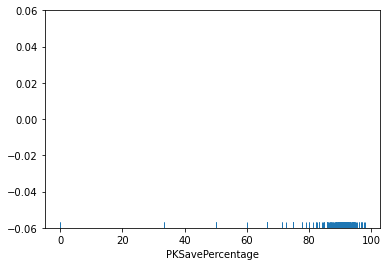

In [43]:
sns.rugplot(df['PKSavePercentage'])

#### Graph Analysis
The above scatter plot demonstrates penalty kill save percentage of the goalies compared to their playerID.  It demonstrates that the most of goalies have  high save percentages when they are at a disadvantage of players (75% or above).  This could suggest that many of the goalies are well suited for the pressure of being disadvantaged and being able to consistently perform well.  Similarly, but not as well demonstrated, the rug plot shows more dense lines towards the 75%-95%

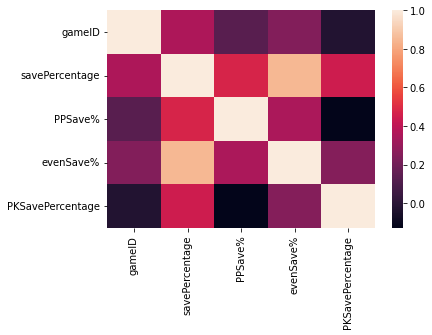

In [44]:
corr = df.corr()
plot2 = sns.heatmap(corr)
plt.show()

#### Graph Analysis

The above heatmap demonstrates the correlation between the average save percentages of each goalie.  As we can see, there is a very strong correlation between the average save percentage and the even save percentage.  In contrast, there is little correlation between the penalty kill save percentage and the average save percentage.  This suggests that when average save percentage changes, even save percentage changes more than the penalty kill save percentage, suggesting that the latter makes up less of the overall average save percentage statistic.  The powerplay save statistic lies in between both of them. 

<AxesSubplot:xlabel='decision', ylabel='PPSave%'>

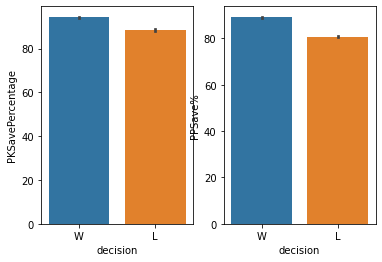

In [34]:
plt.subplot(1,2,1)
sns.barplot(x="decision", y="PKSavePercentage",data=df3)

plt.subplot(1,2,2)
sns.barplot(x="decision", y="PPSave%",data=df3)


#### Graph Analysis
The above bar graphs demomstrate the percentage difference between save percentages for wins and losses.  For the penalty kill save percentages, it makes nearly no difference on the goalies penalty kill save percentage on the outcome of the game.  However, during power plays, having a higher save percentage makes a signifcant impact, nearly 10% difference in whether that team will win.  This could be a result of in game momentum, and being scored on while you have a man advantage could be discouraging resulting in a loss.